In [1]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M
from scipy.optimize import fsolve#
from scipy.integrate import quad

### Things we need to check:

* our A and Lambert's A are different! We should in general check the dimensions of our basin again

* the perimeter P is in accordance though

* is our value for c still accurate?

* Dx strongly impacts our H1 output, what can we do about this?


In [58]:
############ Initilisation #################
############################################

#### Constants #####
L_x = 1e6          # [m] zonal extent 
L_y = 2e6          # [m] meridional extent 
A = L_x*L_y        # [m^2] surface area of interior 
P = 2*L_x+2*L_y    # [m] Perimeter 

g = 9.81           # [m/s^2] gravitational acceleration 
c_theta = 0.5      # [] eddy coefficient thermocline
alpha = 1e-4       # [1/C] thermal expansion coefficient
C_p = 4.2e6        # [J/(m^3*C)] specific heat capacity of sea water 
H_t = 1000          # [m] depth interior
H_s = 200          # [m] depth shelves
W_c = 1e5          # [m] width slope
rho_0 = 1028       # [kg m^-3] reference density sea water 

f_0 = 1.4e-4       # [s^-1] Coriolis parameter 
Gamma = 10         # [W/(m^2 C)] Restoring strength 
T_A = -2            # [Celsius] Atmospheric temperature 

#### Initilisation ####
steps=100         # number of spatial steps
Dx=P/steps         # size of spatial steps

T_0 = np.zeros(steps)
H_1 = np.zeros(steps)
T_1 = np.zeros(steps)
kappa_theta= np.zeros(steps-1)

T_1[0] = 6         # [C] Inflow AW temperature
H_1[0] = 600      # [m] Inflow AW thickness
T_0[0] = 2       # [C] First guess interior DW temperature

In [59]:
integral=0.0
for i in range(1,steps):
    def main(x): # function with six unkowns:  T_1,  H_1, kappa_theta, psi_1, Q_1, delta_rho_theta
                 #                             x[0]  x[1]     x[2]      x[3]  x[4]      x[5]
        return [C_p*((g*(rho_0*alpha*(x[0]-T_0[i-1]))*x[1]**2)/(2*f_0*rho_0))*((x[0]-T_1[i-1])/Dx)+(Gamma*(x[0]-T_A))*W_c,
                ((x[1]-H_1[i-1])/Dx)+((f_0*((c_theta*g*(rho_0*alpha*(x[0]-T_0[i-1]))*(x[1]**2)*(H_t-H_s))/(2*f_0*rho_0*W_c*(H_t-x[1]))))/(g*alpha*(x[0]-T_0[i-1])*x[1]))-((Gamma*W_c*f_0*(x[0]-T_A))/(C_p*g*alpha*(x[0]-T_0[i-1])**2)*x[1])]
    [T_1[i], H_1[i]] = fsolve(main, [T_1[i-1],H_1[i-1]]) 
    integral=integral+Dx*(((c_theta*g*(rho_0*alpha*(T_1[i]-T_0[i-1]))*(H_1[i]**2)*(H_t-H_s))/(2*f_0*rho_0*W_c*(H_t-H_1[i])))*(T_1[i]-T_0[i-1]))
    T_0[i]=T_A+(C_p)/(Gamma*A)*integral

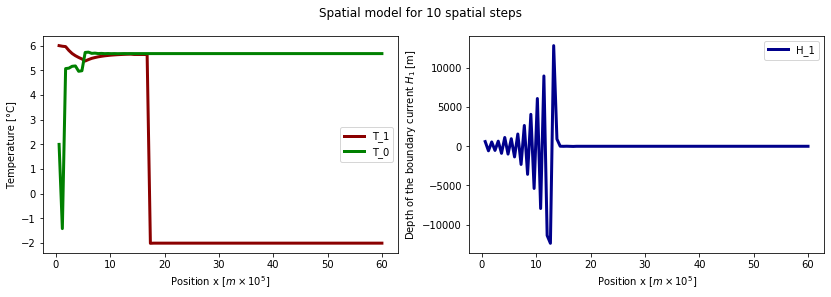

In [65]:
x=np.linspace(0+Dx,steps*Dx,steps)*1e-5

fig, axs = plt.subplots(1, 2,figsize=(14, 4))
axs[0].plot(x, T_1, linewidth=3, label='T_1', color='darkred')
axs[0].plot(x, T_0, linewidth=3, label='T_0', color='green')
axs[0].set(xlabel=r'Position x $[m \times 10^{5}]$', ylabel='Temperature [°C]')
axs[0].legend(loc='best')
axs[1].plot(x, H_1, linewidth=3, label='H_1', color='darkblue')
axs[1].set(xlabel=r'Position x $[m \times 10^{5}]$', ylabel=r'Depth of the boundary current $H_1$ [m]')
axs[1].legend(loc='best')
plt.suptitle('Spatial model for 10 spatial steps')
plt.show()
#plt.savefig('Spatial-2.png', dpi=300, bbox_inches='tight')


In [66]:
T_1

array([ 6.        ,  5.97542011,  5.96090605,  5.8051126 ,  5.68069319,
        5.59191791,  5.52113017,  5.45960163,  5.37794608,  5.43455218,
        5.48397786,  5.51758919,  5.54699021,  5.56884135,  5.58806475,
        5.60265319,  5.61555218,  5.62546078,  5.63418001,  5.64089438,
        5.6468429 ,  5.6520959 ,  5.65498318,  5.64243517,  5.64199039,
        5.64164533,  5.64105559,  5.64077225, -2.00609506, -1.99999613,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.  